In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics.classification import confusion_matrix
from sklearn.metrics.classification import classification_report 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv('sonar.csv')
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
data.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
0.0986    0
0.1539    0
0.1601    0
0.3109    0
0.2111    0
0.1609    0
0.1582    0
0.2238    0
0.0645    0
0.0660    0
0.2273    0
0.3100    0
0.2999    0
0.5078    0
0.4797    0
0.5783    0
0.5071    0
0.4328    0
0.5550    0
0.6711    0
0.6415    0
0.7104    0
0.8080    0
0.6791    0
0.3857    0
         ..
0.2604    0
0.5121    0
0.7547    0
0.8537    0
0.8507    0
0.6692    0
0.6097    0
0.4943    0
0.2744    0
0.0510    0
0.2834    0
0.2825    0
0.4256    0
0.2641    0
0.1386    0
0.1051    0
0.1343    0
0.0383    0
0.0324    0
0.0232    0
0.0027    0
0.0065    0
0.0159    0
0.0072    0
0.0167    0
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

# Exploratory data analysis

In [4]:
data.R.value_counts()

M    111
R     96
Name: R, dtype: int64

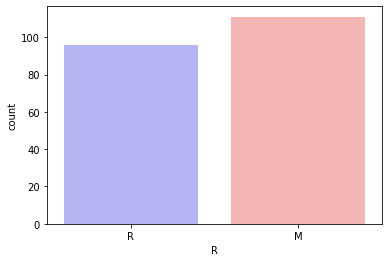

In [5]:
sns.countplot(x="R", data=data, palette="bwr")
plt.show()

In [6]:
data.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


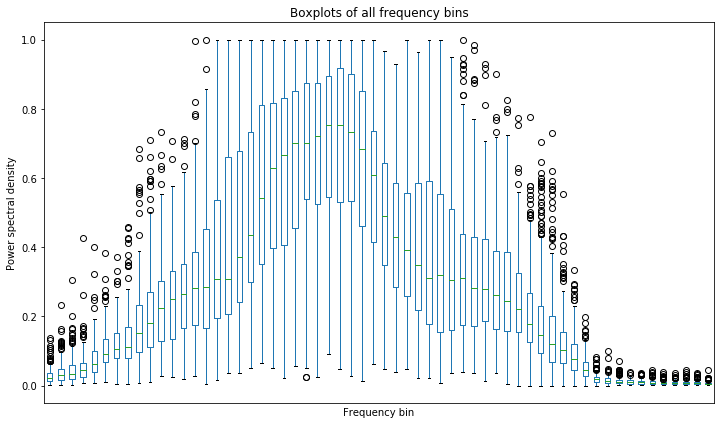

In [7]:
data.plot.box(figsize=(12,7), xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density')
plt.show()

In [8]:
data['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

In [9]:
data.shape

(207, 61)

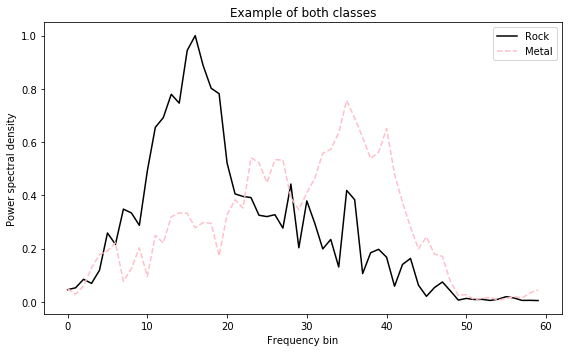

In [10]:
plt.figure(figsize=(8,5))
plt.plot(data[data['R'] == 'R'].values[0][:-1], label='Rock', color='black')
plt.plot(data[data['R'] == 'M'].values[0][:-1], label='Metal', color='pink', linestyle='--')
plt.legend()
plt.title('Example of both classes')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density')
plt.tight_layout()
plt.show()

The dataset is normalized already. Therefore, the only preprocessing we have to do is to encode the classes of type string to integers and split our data into training and testing data. Using 20 % of the data for testing leaves us with 166 samples for training (and validation) as well as 42 samples for final evaluation.

 Now, the last column is a letter. We need to encode it into a numerical value. For this, we can use LabelEncoder

In [11]:
#Inputs (data values) sonar readings from an underground submarine. Cool!
X = data.values[:,0:-1].astype(float)
# Convert classes M (Mine) and R to numbers, since they're categorical values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#Classification target
target = data.R
# Do conversion
le = LabelEncoder.fit(le, y = ["R", "M"])
y = le.transform(target)

In [12]:
from sklearn.model_selection import train_test_split

X = data.copy()
X.drop(['R'], inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, shuffle=True, random_state=42)

In [13]:
#Train kneighbors classifier
from sklearn.neighbors.classification import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 1)
# Fit the model
clf.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=None, n_neighbors=5, p=1,
weights='uniform')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [14]:
predicted = clf.predict(X_test)
print("Accuracy:")
print(accuracy_score(y_test, predicted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))
print("Classification Report:")
print(classification_report(y_test, predicted))

Accuracy:
0.7857142857142857
Confusion Matrix:
[[22  5]
 [ 4 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.69      0.73      0.71        15

    accuracy                           0.79        42
   macro avg       0.77      0.77      0.77        42
weighted avg       0.79      0.79      0.79        42



In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
# Fit the model
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
predicted = clf.predict(X_test)
print("Accuracy:")
print(accuracy_score(y_test, predicted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))
print("Classification Report:")
print(classification_report(y_test, predicted))

Accuracy:
0.7619047619047619
Confusion Matrix:
[[18  9]
 [ 1 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.67      0.78        27
           1       0.61      0.93      0.74        15

    accuracy                           0.76        42
   macro avg       0.78      0.80      0.76        42
weighted avg       0.83      0.76      0.77        42



### find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [35]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics.classification import accuracy_score
    from sklearn.metrics.classification import confusion_matrix
    from sklearn.metrics import  roc_curve, roc_auc_score,auc
    #print(model,parameters)
    

    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 10,refit=True,scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, train_y_pred)
    test_conf = confusion_matrix (y_test, y_pred)
    train_conf = confusion_matrix (y_train, train_y_pred)
    
    
    class_report = classification_report(y_test,y_pred)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
     
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_accuracy across ALL models:\n",
          train_acc)
                                    
    print("\n The test_accuracy across ALL models:\n",
          test_acc) 
    print("\n The train_confusion matrix across ALL models:\n",
          train_conf) 
    print("\n The test_confusion matrix across ALL models:\n",
          test_conf) 
    
    print("\n classification report across ALL models:\n",
          class_report) 
    
    print ("\n ROC_Auc of all models ",
                roc_auc)
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.02, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.5, tree_method=None,
       validate_parameters=False, verbosity=None)

 The best score across ALL searched params:
 0.8967064308240781

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}

 The train_accuracy across ALL models:
 1.0

 The test_accuracy across ALL mod

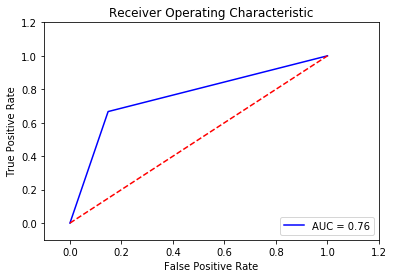

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.90092741680977

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}

 The train_accuracy across ALL models:
 1.0

 The test_accuracy across ALL models:
 0.80952

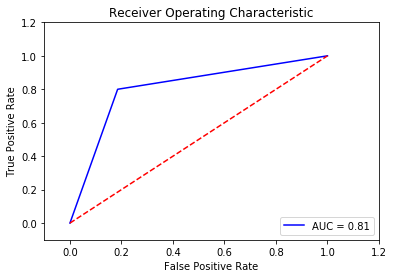

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 The best score across ALL searched params:
 0.836528621017785

 The best parameters across ALL searched params:
 {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 6}

 The train_accuracy across ALL models:
 0.9818181818181818

 The test_accuracy across ALL models:
 0.7619047619047619

 The train_confusion matrix across ALL models:
 [[83  1]
 [ 2 79]]

 The test_confusion matrix across ALL models

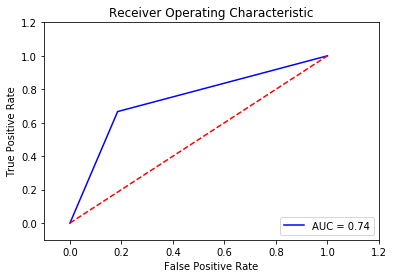

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

 The best score across ALL searched params:
 0.8159616527263586

 The best parameters across ALL searched params:
 {'C': 10, 'kernel': 'linear'}

 The train_accuracy across ALL models:
 0.8909090909090909

 The test_accuracy across ALL models:
 0.6666666666666666

 The train_confusion matrix across ALL models:
 [[76  8]
 [10 71]]

 The test_confusion matrix across ALL models:
 [[17 10]
 [ 4 11]]

 classification report across ALL models:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71        27
           1       0.52      0.73      0.61

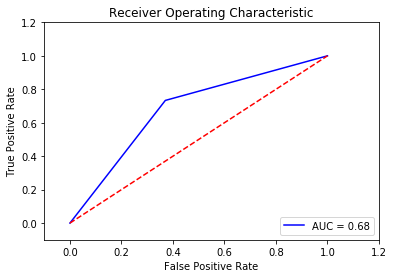

None



In [36]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
alg = [XGBClassifier(),GradientBoostingClassifier(), RandomForestClassifier(),SVC(probability=True)]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8,10]},
              
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8,10]},
              
              { 'max_depth'    : [4,6,8,10],
                  'min_samples_split' : [2,3,4,6],
                  'max_features'    : ['auto','sqrt','log2']},
              
              {'kernel':['linear', 'rbf'], 
                'C':[1, 10]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

#### we can see that the 'GradientBoostingClassifier' model has best score and their true positive rate and false positive rate are better as campare to other models

#### bar plot of features importances

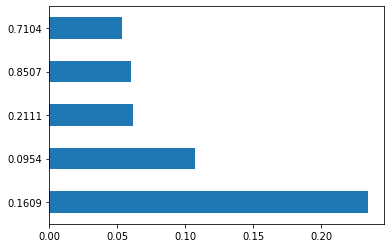

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

from this graph we can see that the most important feature for this model is '0.1609'.

## save model

In [18]:
import pickle

In [19]:
filename='sonar_GradientBoostingClassifier_model.sav'

In [20]:
pickle.dump(model, open(filename, 'wb'))

In [21]:
load_lr_model =pickle.load(open(filename, 'rb'))